외부모듈 로드 및 data 수집 정리

In [12]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
(t_x,t_y),(tt_x,tt_y) = keras.datasets.fashion_mnist.load_data()
s_t_x= t_x/255.0
s_tt_x=tt_x/255.0
from sklearn.model_selection import train_test_split
t_x,v_x,t_y,v_y=train_test_split(s_t_x,t_y,test_size=0.2,random_state=42)

모델생성 및 학습방식 결정

In [2]:
m1=keras.Sequential()
m1.add(keras.layers.Flatten(input_shape=(28,28)))#784
m1.add(keras.layers.Dense(100,activation='relu'))#100
m1.add(keras.layers.Dense(300,activation='relu'))#300
m1.add(keras.layers.Dense(10,activation='softmax'))
m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

m2=keras.Sequential()
m2.add(keras.layers.Flatten(input_shape=(28,28)))#784
m2.add(keras.layers.Dense(300,activation='relu'))#300
m2.add(keras.layers.Dense(100,activation='relu'))#100
m2.add(keras.layers.Dense(10,activation='softmax'))
m2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

m3=keras.Sequential()
m3.add(keras.layers.Flatten(input_shape=(28,28)))
m3.add(keras.layers.Dense(300,activation='relu'))
m3.add(keras.layers.Dense(100,activation='relu'))
m3.add(keras.layers.Dense(10,activation='softmax'))
m3.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')

모델 학습

In [3]:
history1=m1.fit(t_x,t_y,epochs=30,validation_data=(v_x,v_y))
history2=m2.fit(t_x,t_y,epochs=30,validation_data=(v_x,v_y))
history3=m3.fit(t_x,t_y,epochs=20,validation_data=(v_x,v_y))

Epoch 1/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5080 - accuracy: 0.8180 - val_loss: 0.4148 - val_accuracy: 0.8472
Epoch 2/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3751 - accuracy: 0.8626 - val_loss: 0.3696 - val_accuracy: 0.8645
Epoch 3/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3357 - accuracy: 0.8759 - val_loss: 0.3433 - val_accuracy: 0.8716
Epoch 4/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3090 - accuracy: 0.8858 - val_loss: 0.3373 - val_accuracy: 0.8755
Epoch 5/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2913 - accuracy: 0.8903 - val_loss: 0.3422 - val_accuracy: 0.8740
Epoch 6/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2777 - accuracy: 0.8960 - val_loss: 0.3144 - val_accuracy: 0.8848
Epoch 7/30
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2632 - accuracy: 0.9000 - val_loss: 0.3470 - val_accuracy:

시각화

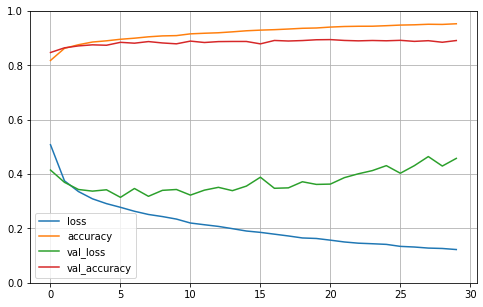

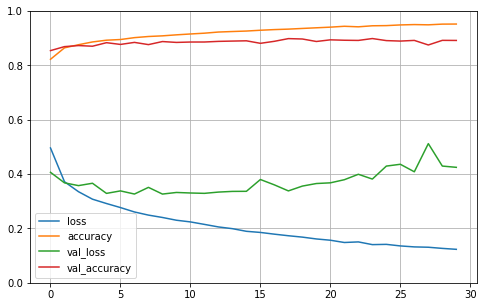

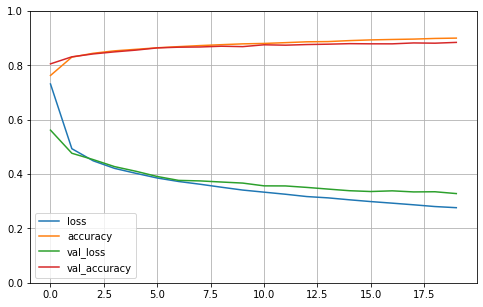

In [4]:
pd.DataFrame(history1.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

pd.DataFrame(history2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
    
pd.DataFrame(history3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

테스트 검증

In [5]:
m1.evaluate(s_tt_x,tt_y),m2.evaluate(s_tt_x,tt_y),m3.evaluate(s_tt_x,tt_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.3500 - accuracy: 0.8742


([0.4828263819217682, 0.886900007724762],
 [0.4620325565338135, 0.8881000280380249],
 [0.34996411204338074, 0.8741999864578247])

In [6]:
m4=keras.Sequential()
m4.add(keras.layers.Flatten(input_shape=(28,28)))
m4.add(keras.layers.Dense(50,activation='relu'))
m4.add(keras.layers.Dense(40,activation='relu'))
m4.add(keras.layers.Dense(10,activation='relu'))
m4.add(keras.layers.Dense(10,activation='softmax'))
m4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 40)                2040      
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
Total params: 41,810
Trainable params: 41,810
Non-trainable params: 0
_________________________________________________________________


In [8]:
m4.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics='accuracy')
hy=m4.fit(t_x,t_y,validation_data=(v_x,v_y),epochs=40)

Epoch 1/40
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1078 - accuracy: 0.5897 - val_loss: 0.7143 - val_accuracy: 0.7570
Epoch 2/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.6506 - accuracy: 0.7738 - val_loss: 0.6008 - val_accuracy: 0.8008
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8109 - val_loss: 0.5695 - val_accuracy: 0.8017
Epoch 4/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.5043 - accuracy: 0.8280 - val_loss: 0.5048 - val_accuracy: 0.8323
Epoch 5/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4682 - accuracy: 0.8405 - val_loss: 0.4916 - val_accuracy: 0.8323
Epoch 6/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4423 - accuracy: 0.8475 - val_loss: 0.4640 - val_accuracy: 0.8385
Epoch 7/40
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4233 - accuracy: 0.8529 - val_loss: 0.4405 - val_accuracy:

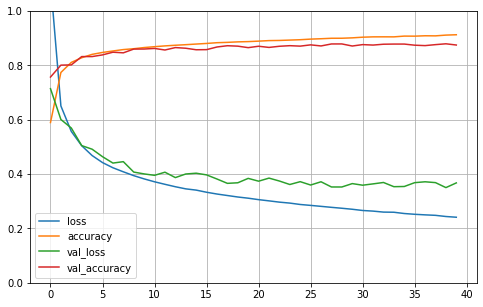

In [15]:
pd.DataFrame(hy.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

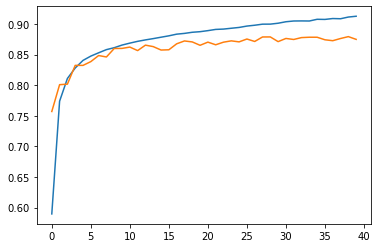

In [16]:
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])#검증

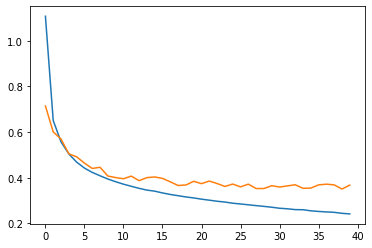

In [14]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])